In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


import sys
import os

import pandas as pd

In [15]:
HEADERS = ['enc_type', 'n_states', 'sim_type', 'shots', 'optimizer', 'energy']

df = pd.DataFrame(columns = HEADERS)

In [3]:
diagonalized_values = np.array([
 #       [1,  -0.43658111],
        [2, -1.749160],
        [3, -2.045671], 
        [4, -2.1439810], 
        [5, -2.183592], 
        [6, -2.201568], 
        [7, -2.210416], 
        [8, -2.215038],
        [16, -2.221059]
]) 

In [16]:
for directory in ["2020-07-10-outputs-qiskit-qasm_simulator/", "2020-07-10-outputs-qiskit-statevector_simulator/"]:
    for filename in os.listdir(f"{directory}"):
        if "energies.npy" not in filename:
            continue 
            
        enc_type = ""
        if 'gray_code' in filename:
            enc_type = "Gray code"
        else:
            enc_type = "Jordan-Wigner"
            if 'original' in directory:
                enc_type += "-original"
                
        optimizer = 'SPSA' if 'SPSA' in filename else 'Nelder-Mead'
        sim_type = 'QASM' if 'qasm' in filename else 'Statevector'
        n_shots = 0
        n_states = int(filename.split("-")[3].split("_")[0])

        base_dict = {'enc_type' : enc_type,
                    'n_states' : n_states,
                    'sim_type' : sim_type,
                    'shots' : 10000,
                    'optimizer' : optimizer}                  

        data = np.load(f"{directory}/{filename}")

        for energy in data:
            next_dict = base_dict
            next_dict['energy'] = energy
            df = df.append(next_dict, ignore_index=True)

In [17]:
pd.set_option('display.max_rows', len(df))

In [18]:
df.groupby(['enc_type', 'sim_type', 'n_states', 'shots', 'optimizer']).describe()

energy            \
                                                    count      mean   
enc_type      sim_type    n_states shots optimizer                    
Gray code     QASM        2        10000 SPSA       100.0 -1.751833   
                          3        10000 SPSA       100.0 -2.036503   
                          4        10000 SPSA       100.0 -2.152996   
                          5        10000 SPSA       100.0 -2.149247   
                          6        10000 SPSA       100.0 -2.183521   
                          7        10000 SPSA       100.0 -2.184026   
                          8        10000 SPSA       100.0 -2.191698   
                          16       10000 SPSA       100.0 -2.154139   
              Statevector 2        10000 SPSA       100.0 -1.749160   
                          3        10000 SPSA       100.0 -2.045599   
                          4        10000 SPSA       100.0 -2.143980   
                          5        10000 SPSA       100.0 -2.183553   
                          6        10000 SPSA       100.0 -2.201531   
                          7        10000 SPSA       100.0 -2.210342   
                          8        10000 SPSA       100.0 -2.215015   
                          16       10000 SPSA       100.0 -2.217385   
Jordan-Wigner QASM        2        10000 SPSA       100.0 -1.746850   
                          3        10000 SPSA       100.0 -2.031319   
                          4        10000 SPSA       100.0 -2.146197   
                          5        10000 SPSA       100.0 -2.167778   
                          6        10000 SPSA       100.0 -2.126552   
                          7        10000 SPSA       100.0 -2.052857   
                          8        10000 SPSA       100.0 -1.928276   
              Statevector 2        10000 SPSA       100.0 -1.749160   
                          3        10000 SPSA       100.0 -2.045671   
                          4        10000 SPSA       100.0 -2.143981   
                          5        10000 SPSA       100.0 -2.183592   
                          6        10000 SPSA       100.0 -2.201568   
                          7        10000 SPSA       100.0 -2.210415   
                          8        10000 SPSA       100.0 -2.215036   

                                                                            \
                                                             std       min   
enc_type      sim_type    n_states shots optimizer                           
Gray code     QASM        2        10000 SPSA       5.157924e-02 -1.875105   
                          3        10000 SPSA       6.301197e-02 -2.203044   
                          4        10000 SPSA       7.468212e-02 -2.359615   
                          5        10000 SPSA       7.809877e-02 -2.295499   
                          6        10000 SPSA       9.197669e-02 -2.381838   
                          7        10000 SPSA       7.335736e-02 -2.354067   
                          8        10000 SPSA       9.079832e-02 -2.425289   
                          16       10000 SPSA       8.857369e-02 -2.340987   
              Statevector 2        10000 SPSA       0.000000e+00 -1.749160   
                          3        10000 SPSA       1.516537e-05 -2.045616   
                          4        10000 SPSA       7.908431e-07 -2.143981   
                          5        10000 SPSA       1.805920e-05 -2.183578   
                          6        10000 SPSA       1.806626e-05 -2.201559   
                          7        10000 SPSA       3.365974e-05 -2.210377   
                          8        10000 SPSA       1.057102e-05 -2.215033   
                          16       10000 SPSA       2.683466e-03 -2.220299   
Jordan-Wigner QASM        2        10000 SPSA       4.894848e-02 -1.873611   
                          3        10000 SPSA       8.330906e-02 -2.293719   
                          4        10000 SPSA       1.236451e-01 -2.4

Note: for the cases in the dense version where it makes sense to make a comparison, i.e. 2, 4, 8, it looks like the variance is lower, and we also got slightly closer to the actual minimum energy for the lowest version.

## Minimum energies

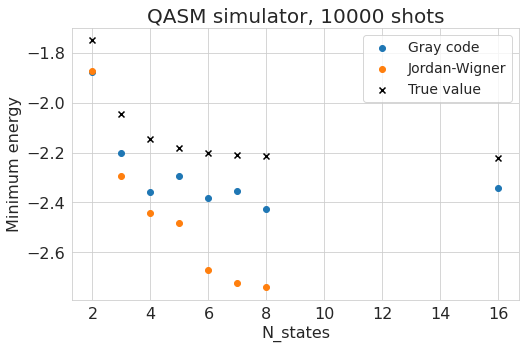

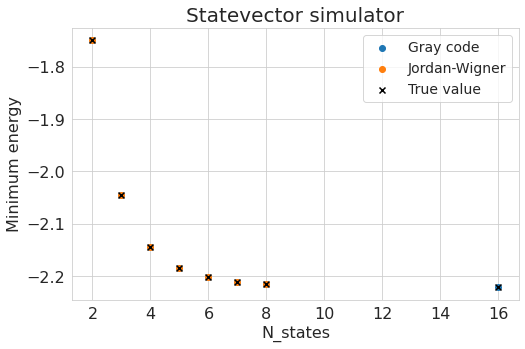

In [19]:
colours ={"Gray code" : "tab:blue", 
          "Jordan-Wigner" : "tab:orange", 
          "Jordan-Wigner-original" : "tab:green"}

for key, grp in df.groupby(['sim_type']):

    plt.figure(figsize=(8, 5))
    
    for encoding_key, encoding_group in grp.groupby(['enc_type']):
        data = encoding_group.groupby(['n_states'])['energy'].min()
        plt.scatter(x=data.index.to_numpy(), y=data.to_numpy(), marker='o', 
                 label=encoding_key, color=colours[encoding_key])
    
    plt.scatter(x=diagonalized_values[:,0], y=diagonalized_values[:, 1], marker='x', color='black', label='True value')
    
    plt.xlabel("N_states", fontsize=16)
    plt.ylabel("Minimum energy", fontsize=16)
    
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
        
    title_string = f"{key} simulator"
    if key == 'QASM':
        title_string += f', 10000 shots'
    plt.title(title_string, fontsize=20)
    
    plt.legend(fontsize=14)
    #plt.savefig(f'Minimium-energy-{title_string}.pdf')
    plt.show()

## Average energies

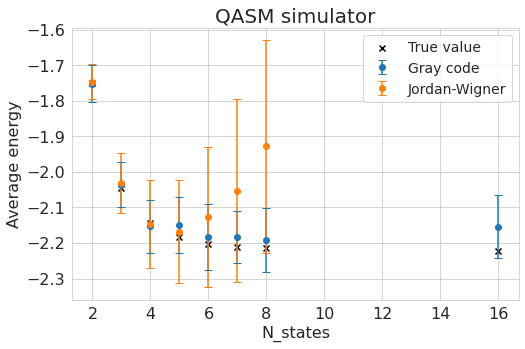

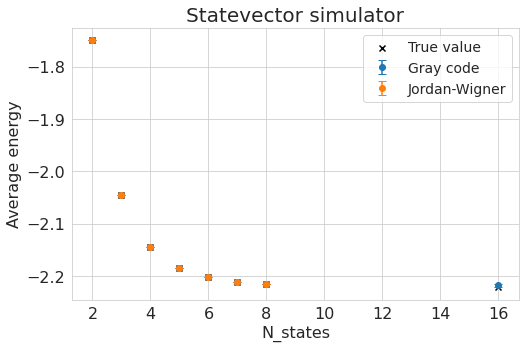

In [20]:
for key, grp in df.groupby(['sim_type']):
    
    plt.figure(figsize=(8, 5))
    
    for encoding_key, encoding_group in grp.groupby(['enc_type']):
        split_by_state = encoding_group.groupby(['n_states'])
        n_states = split_by_state.groups.keys()
        means = split_by_state['energy'].mean()
        std = split_by_state['energy'].std()
        plt.errorbar(n_states, means, yerr=std, capsize=4, fmt='o', label=encoding_key, color=colours[encoding_key])
        
    plt.scatter(x=diagonalized_values[:,0], y=diagonalized_values[:, 1], marker='x', color='black', label='True value')
    
    plt.xlabel("N_states", fontsize=16)
    plt.ylabel("Average energy", fontsize=16)
    
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
        
    title_string = f"{key} simulator"
    if key[0] == 'QASM':
        title_string += f', 10000 shots'
    plt.title(title_string, fontsize=20)
    
    plt.legend(fontsize=14)
    #plt.savefig(f'Average-energy-{title_string}.pdf')
    plt.show()

## Variance

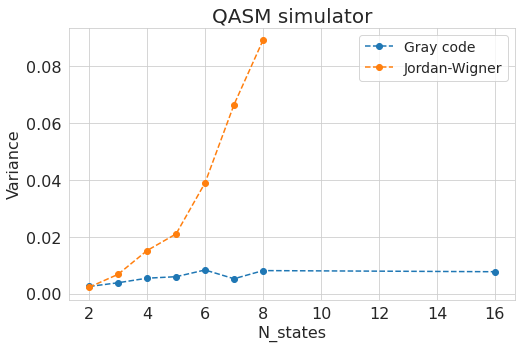

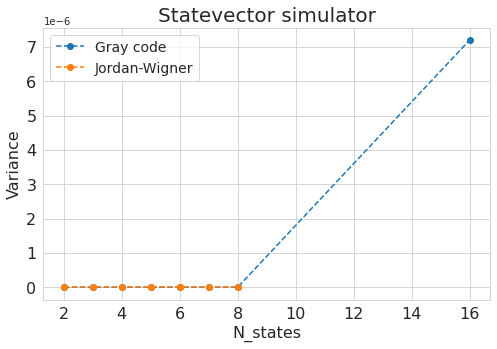

In [21]:
for key, grp in df.groupby(['sim_type']):

    plt.figure(figsize=(8, 5))
    
    for encoding_key, encoding_group in grp.groupby(['enc_type']):
        plt.plot(encoding_group.groupby(['n_states'])['energy'].var(), linestyle='--', marker='o', label=encoding_key)
        
    plt.xlabel("N_states", fontsize=16)
    plt.ylabel("Variance", fontsize=16)
    
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
        
    title_string = f"{key} simulator"
    if key[0] == 'QASM':
        title_string += f', 10000 shots'
    plt.title(title_string, fontsize=20)
    
    plt.legend(fontsize=14)
    plt.show()

## Paper plots

From this point forward, we will remove the "original" ansatz from consideration, and consider only the inverted one since we found it gave greater stability for the statevector simulator, and comparable stability for the QASM simulator.

In [49]:
df = df[df['enc_type'] != "Jordan-Wigner-original"]

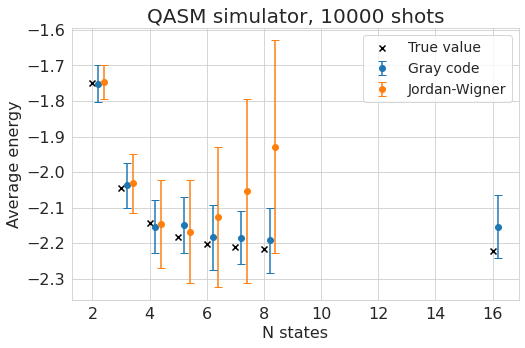

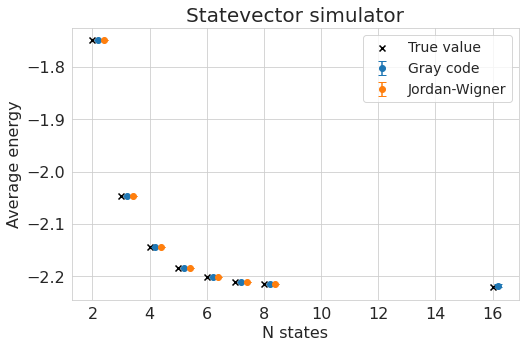

In [22]:
for key, grp in df.groupby(['sim_type']):
    
    plt.figure(figsize=(8, 5))
         
    plt.scatter(x=diagonalized_values[:,0], y=diagonalized_values[:, 1], marker='x', color='black', label='True value')
    
    count = 1
    for encoding_key, encoding_group in grp.groupby(['enc_type']):
        split_by_state = encoding_group.groupby(['n_states'])
        n_states = np.array(list(split_by_state.groups.keys()))
        means = split_by_state['energy'].mean()
        std = split_by_state['energy'].std()
        plt.errorbar(n_states + 0.2*count, means, yerr=std, capsize=4, fmt='o', label=encoding_key, color=colours[encoding_key])
        count += 1
        
    plt.xlabel("N states", fontsize=16)
    plt.ylabel("Average energy", fontsize=16)
    
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
        
    title_string = f"{key} simulator"
    if key == 'QASM':
        title_string += f', 10000 shots'
    plt.title(title_string, fontsize=20)
    
    plt.legend(fontsize=14)
    
    if key == 'QASM':
        plt.savefig(f'nonoise-qasm-avgenergy.pdf')
        
    plt.show()

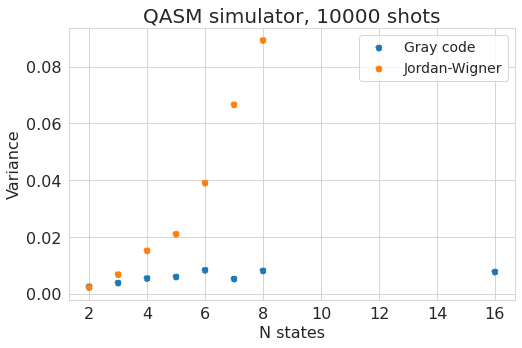

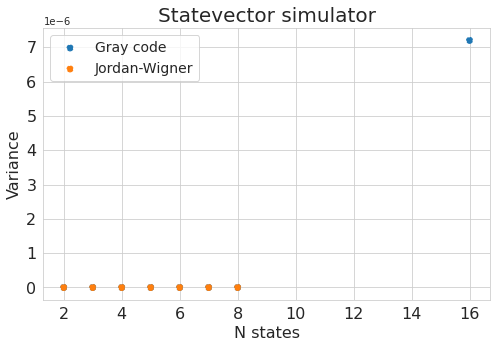

In [23]:
for key, grp in df.groupby(['sim_type']):

    plt.figure(figsize=(8, 5))
    
    for encoding_key, encoding_group in grp.groupby(['enc_type']):        
        split_by_state = encoding_group.groupby(['n_states'])
        n_states = np.array(list(split_by_state.groups.keys()))
        plt.scatter(n_states, split_by_state['energy'].var(), linestyle='--', marker='o', label=encoding_key)
        
    plt.xlabel("N states", fontsize=16)
    plt.ylabel("Variance", fontsize=16)
    
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
        
    title_string = f"{key} simulator"
    if key == 'QASM':
        title_string += f', 10000 shots'
    plt.title(title_string, fontsize=20)
    
    plt.legend(fontsize=14)
    
    if key == 'QASM':
        plt.savefig("nonoise-qasm-variance.pdf")
    
    plt.show()

## Energy distribution

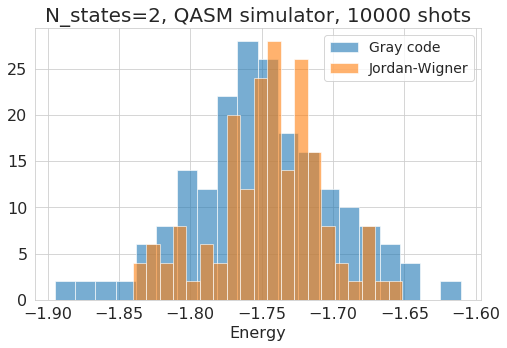

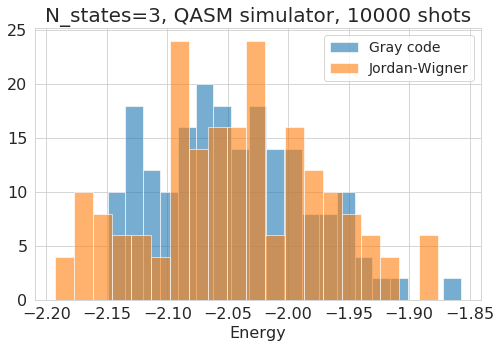

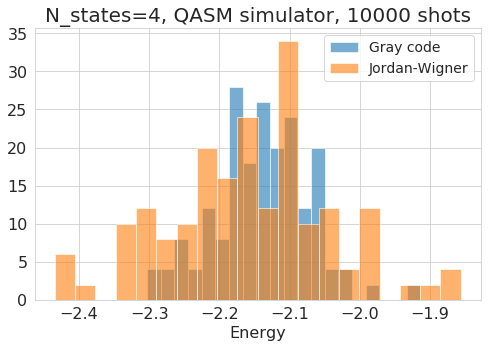

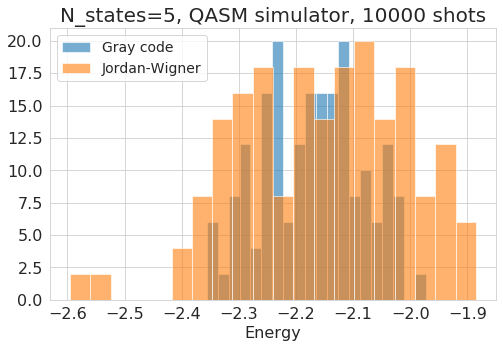

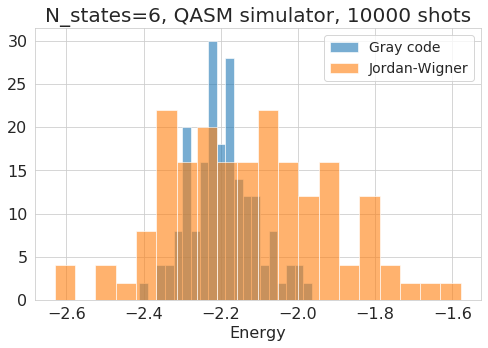

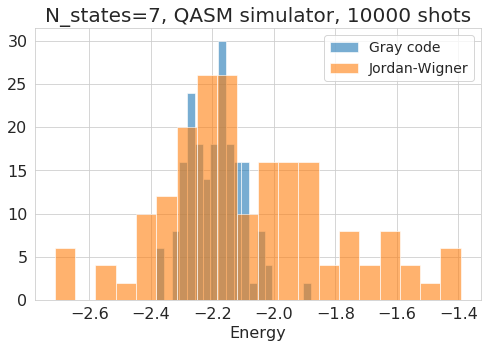

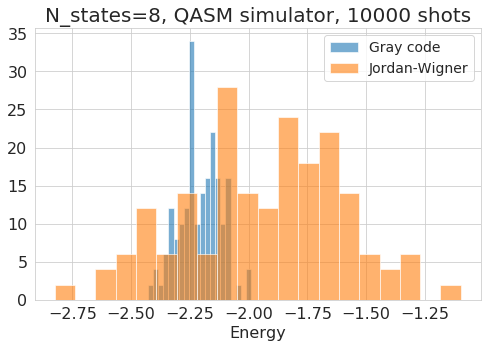

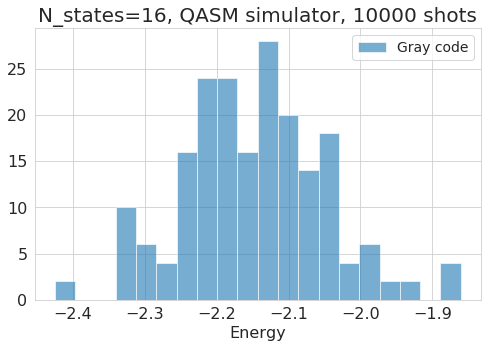

In [60]:
for key, grp in df.groupby(['sim_type', 'n_states']):
    if key[0] == 'Statevector':
        continue
    
    plt.figure(figsize=(8, 5))
    
    for encoding_key, encoding_group in grp.groupby(['enc_type']):
        #rint(encoding_group['energy'])
        plt.hist(encoding_group['energy'], alpha=0.6, bins = 20, label=encoding_key)
    
    plt.legend(fontsize=14)    
    
    plt.xlabel("Energy", fontsize=16)
    
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    title_string = f"N_states={key[-1]}, "
    if key[0] == 'Statevector':
        title_string += 'statevector simulator'
    else:
        title_string += f'QASM simulator, 10000 shots'
    plt.title(title_string, fontsize=20)
    
    #plt.savefig(f"{''.join(title_string)}.pdf")
    plt.show()
    

## Boxplots

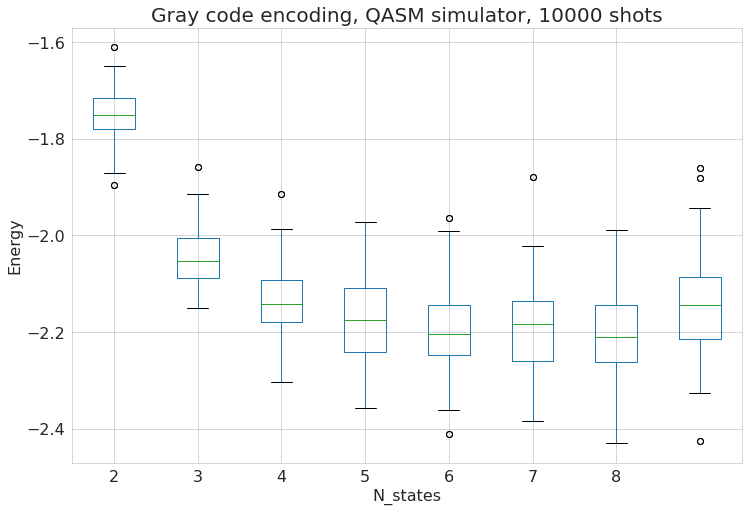

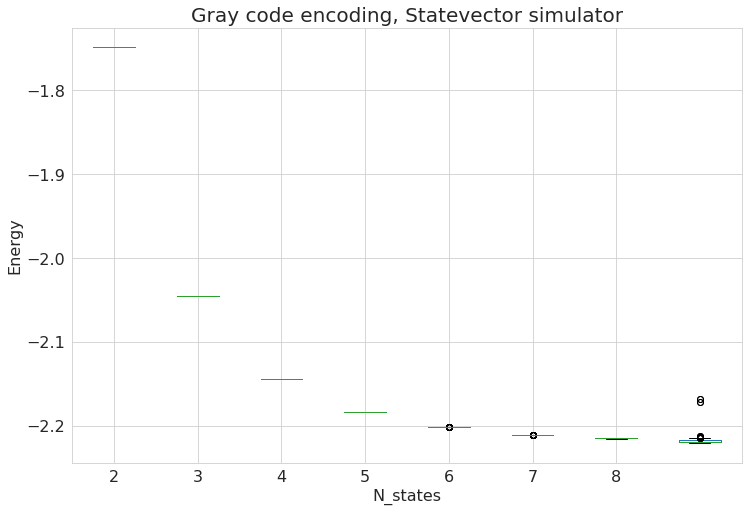

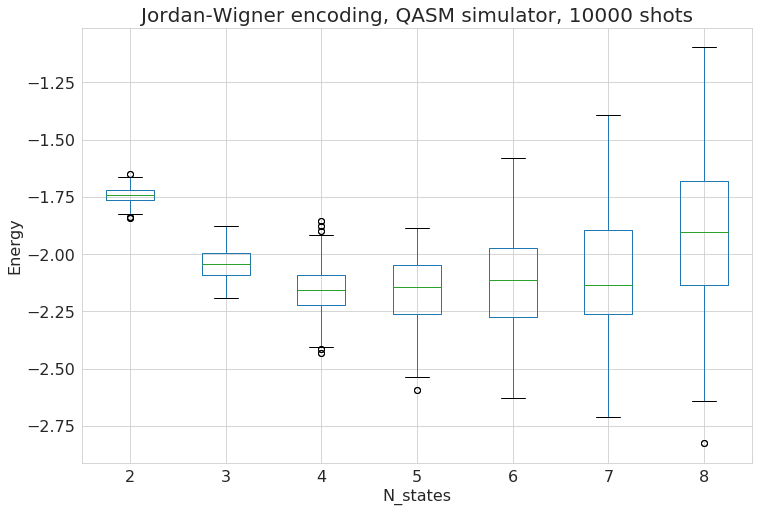

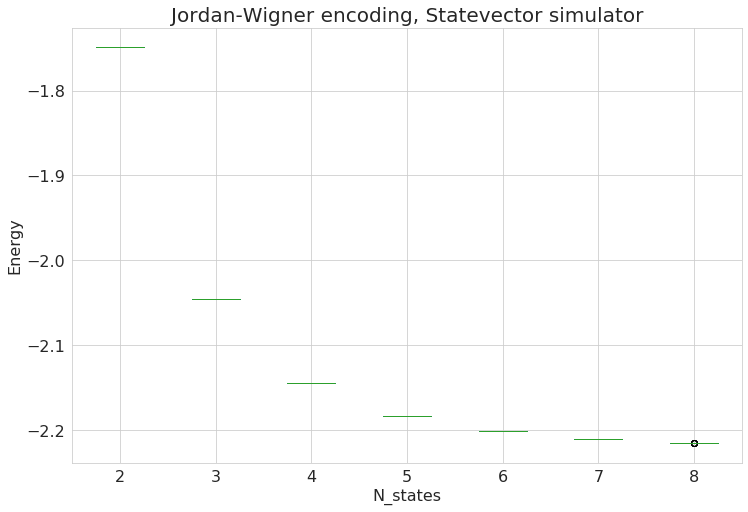

In [61]:
for key, grp in df.groupby(['enc_type', 'sim_type']):
    
    grp.groupby('n_states').boxplot(['energy'], figsize=(12, 8), fontsize=16)
    plt.title(key)
    
    if key[0] == 'dense':
        plt.xticks(range(1, 9), labels=(list(range(2, 9)) + [16]))
    else:
        plt.xticks(range(1, 8), labels=range(2, 9))
    
    plt.xlabel("N_states", fontsize=16)
    plt.ylabel("Energy", fontsize=16)
    
    title_string = f"{key[0]} encoding, "
    if key[1] == 'Statevector':
        title_string += 'Statevector simulator'
    else:
        title_string += f'QASM simulator, 10000 shots'
    plt.title(title_string, fontsize=20)
    plt.show()
    print()

## Compute the distance from true energy

In [ ]:
diagonal_energies = np.array([x[1] for x in diagonalized_values[2:]])

for key, grp in df.groupby(['sim_type']):

    plt.figure(figsize=(8, 5))
    
    for encoding_key, encoding_group in grp.groupby(['enc_type']):
        min_energies = np.min(encoding_group.groupby(['n_states']))['energy']
        print(min_energies)
        plt.plot(np.power(min_energies - diagonal_energies[:len(min_energies)], 1), linestyle='--', marker='o', label=encoding_key)
        
    plt.xlabel("N_states", fontsize=16)
    plt.ylabel("Minimum distance from true energy", fontsize=16)
    
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
        
    
    title_string = f"{key} version"
    if key == 'QASM':
        title_string += f', 10000 shots'
    plt.title(title_string, fontsize=20)
    
    plt.legend(fontsize=14)
    plt.show()

In [ ]:
# for key, grp in df.groupby(['sim_type', 'n_states']):
    
#     plt.figure(figsize=(8, 5))
    
#     for encoding_key, encoding_group in grp.groupby(['enc_type']):
#         sns.kdeplot(encoding_group['energy'], bw=0.5, label=encoding_key)
    
#     if key[-1] == 16:
#         plt.axvline(x=diagonalized_values[-1][1], color='black', label=f'N_states = {key[-1]}', alpha=0.8)
#     else:
#         plt.axvline(x=diagonalized_values[key[-1]][1], color='black', label=f'N_states = {key[-1]}', alpha=0.8)
    
#     plt.legend(fontsize=14)    
    
#     plt.xlim(-3, -1)
#     plt.xlabel("Energy", fontsize=16)
    
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)
    
#     title_string = f"N_states={key[-1]}, "
#     if key[0] == 'Statevector':
#         title_string += f'{key[0]} simulator'
#     else:
#         title_string += f'{key[0]} simulator, 10000 shots'
#     plt.title(title_string, fontsize=20)
    
#     plt.savefig(f"{''.join(title_string)}.pdf")
#     plt.show()

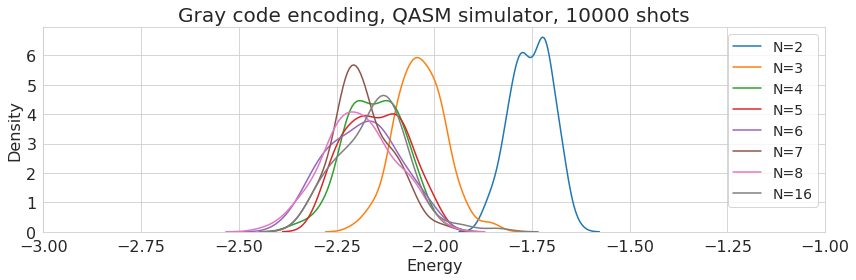

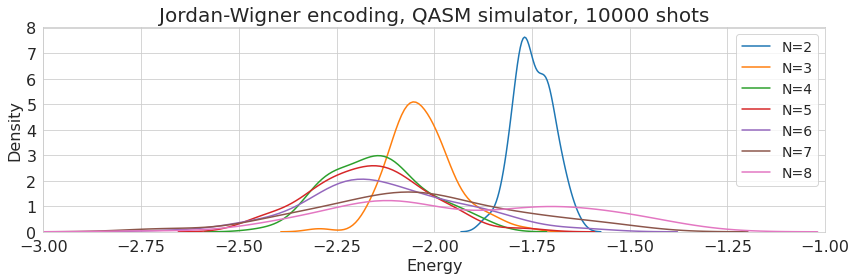

In [31]:
import seaborn as sns
sns.set_style('whitegrid')

for key, grp in df.groupby(['sim_type', 'enc_type']):
    if key[0] == 'Statevector':
        continue 
        
    plt.figure(figsize=(12, 4))
    
    for encoding_key, encoding_group in grp.groupby(['n_states']):
        sns.kdeplot(encoding_group['energy'], bw='scott', label=f"N={encoding_key}")
    
    plt.legend(fontsize=14)    
    
    plt.xlabel("Energy", fontsize=16)
    plt.ylabel("Density", fontsize=16)
    plt.xlim(-3, -1)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    title_string = f"{key[-1]} encoding, "
    if key[0] == 'Statevector':
        title_string += 'Statevector simulator'
    else:
        title_string += f'QASM simulator, 10000 shots'
    plt.title(title_string, fontsize=20)
    
    plt.tight_layout()
    plt.savefig(f"{''.join(title_string)}.pdf")
    plt.show()
    

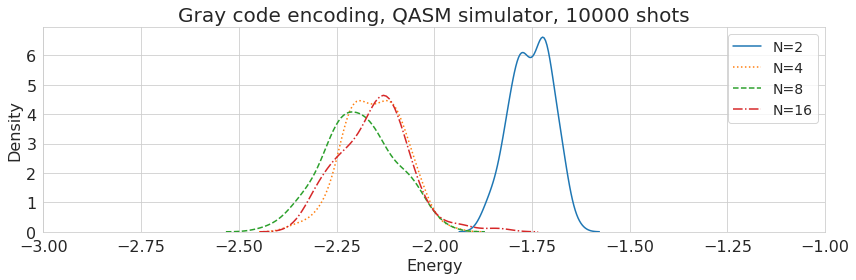

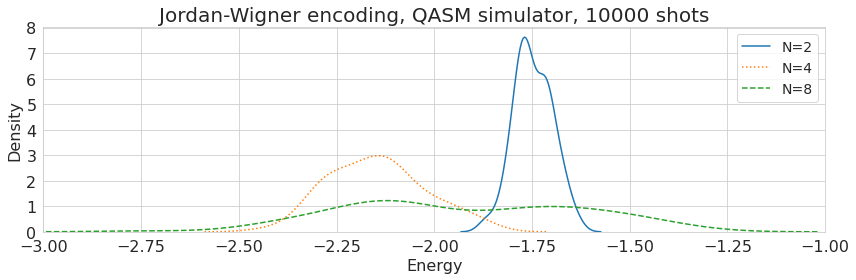

In [32]:
import seaborn as sns
sns.set_style('whitegrid')

linestyles = ['solid', 'dotted', 'dashed', 'dashdot']

for key, grp in df.groupby(['sim_type', 'enc_type']):
    if key[0] == 'Statevector':
        continue 
        
    plt.figure(figsize=(12, 4))
    
    count = 0
    for encoding_key, encoding_group in grp.groupby(['n_states']):
        if encoding_key in [2, 4, 8, 16]:
            sns.kdeplot(encoding_group['energy'], bw='scott', label=f"N={encoding_key}", linestyle=linestyles[count])
            count += 1
    
    plt.legend(fontsize=14)    
    
    plt.xlabel("Energy", fontsize=16)
    plt.ylabel("Density", fontsize=16)
    plt.xlim(-3, -1)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    title_string = f"{key[-1]} encoding, "
    if key[0] == 'Statevector':
        title_string += 'Statevector simulator'
    else:
        title_string += f'QASM simulator, 10000 shots'
    plt.title(title_string, fontsize=20)
    
    plt.tight_layout()
    plt.savefig(f"combined-kde-plot-{key[1]}.pdf")